# Basic Topology

Notebook playground to analyze basic topology of Wikipedia article links graph.

In [1]:
import collections
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
graphml_file = "../data/combined_wikilink.graphml"

G = nx.read_graphml(graphml_file)
G = G.to_directed()

### Number of Nodes and Edges

In [3]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 627038
Number of edges: 1500000


### Graph Density

- $\approx$0 Extremely sparse (e.g., social networks, web graphs)
- $\approx$1 Fully connected (rare in real-world systems).
- Real-world networks: Often have densities between $10^{-6}$ and $10^{-2}$

In [4]:
nx.density(G)

3.815085099952344e-06

### Degree Distribution

Results roughly show a Power-Law relationship.

- In-Degree Plot: Shows how many articles are linked to (e.g., high in-degree = "hub" articles like "Mathematics").
- Out-Degree Plot: Shows how many articles link out (e.g., high out-degree = "connector" articles like "Lists of topics").

In [5]:
in_degrees = [degree for _, degree in G.in_degree()]
out_degrees = [degree for _, degree in G.out_degree()]

in_degree_counts = collections.Counter(in_degrees)
out_degree_counts = collections.Counter(out_degrees)

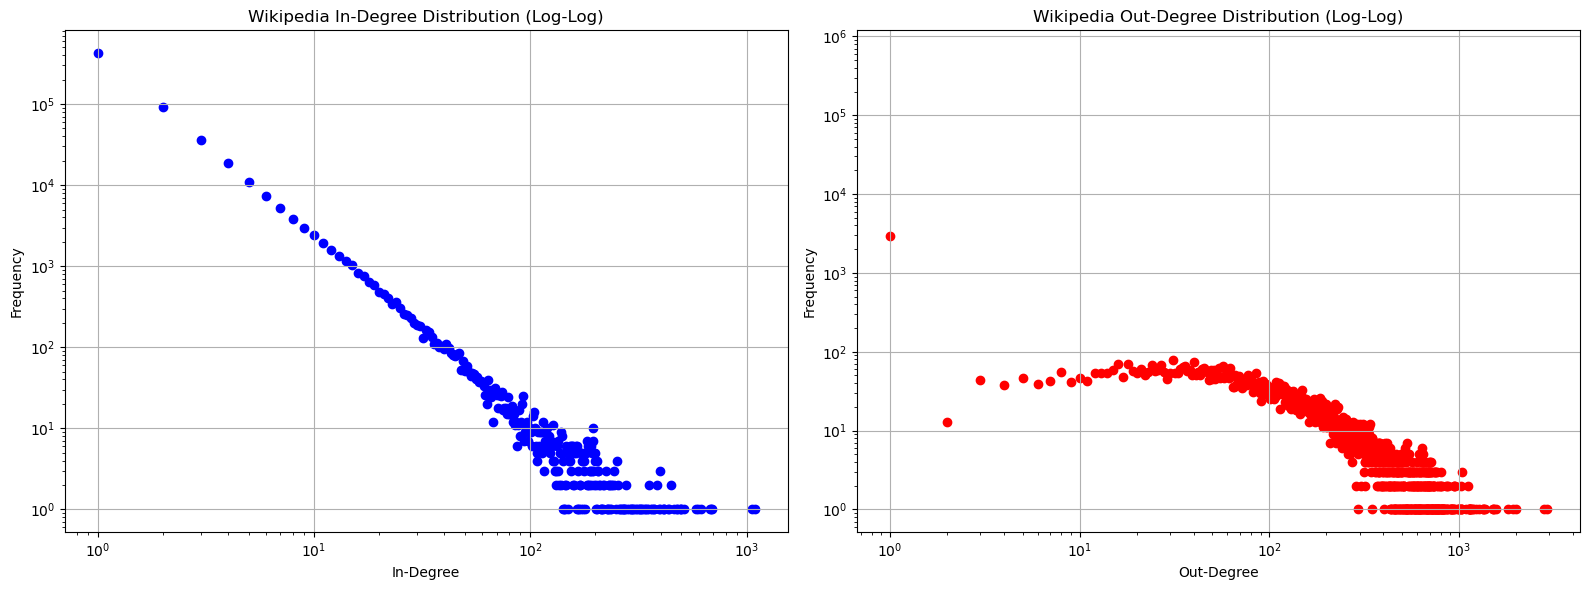

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.scatter(in_degree_counts.keys(), in_degree_counts.values(), color='blue')
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_title("Wikipedia In-Degree Distribution (Log-Log)")
ax1.set_xlabel("In-Degree")
ax1.set_ylabel("Frequency")
ax1.grid(True)

ax2.scatter(out_degree_counts.keys(), out_degree_counts.values(), color='red')
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_title("Wikipedia Out-Degree Distribution (Log-Log)")
ax2.set_xlabel("Out-Degree")
ax2.set_ylabel("Frequency")
ax2.grid(True)

plt.tight_layout()
plt.show()

### Connected Components

In [7]:
# Count SCCs
num_scc = nx.number_strongly_connected_components(G)
print(f"Number of SCCs: {num_scc}")

# Get the largest SCC
largest_scc = max(nx.strongly_connected_components(G), key=len)
print(f"Largest SCC size: {len(largest_scc)}")

Number of SCCs: 619424
Largest SCC size: 7580
